In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from BAG_DTHelper import experiment, NUM_TRIALS

# Importing and Preparing Dataset

In [2]:
# Import all 8 tennis tournament datasets
tennis_tournament_aus_men = pd.read_csv('./TennisTournament/AusOpen-men-2013.csv')
tennis_tournament_aus_women = pd.read_csv('./TennisTournament/AusOpen-women-2013.csv')
tennis_tournament_french_men = pd.read_csv('./TennisTournament/FrenchOpen-men-2013.csv')
tennis_tournament_french_women = pd.read_csv('./TennisTournament/FrenchOpen-women-2013.csv')
tennis_tournament_us_men = pd.read_csv('./TennisTournament/USOpen-men-2013.csv')
tennis_tournament_us_women = pd.read_csv('./TennisTournament/USOpen-women-2013.csv')
tennis_tournament_wimbledon_men = pd.read_csv('./TennisTournament/Wimbledon-men-2013.csv')
tennis_tournament_wimbledon_women = pd.read_csv('./TennisTournament/Wimbledon-women-2013.csv')

# Combine all datasets
tennis_tournament = pd.concat([tennis_tournament_aus_men, tennis_tournament_aus_women,
                               tennis_tournament_french_men, tennis_tournament_french_women,
                               tennis_tournament_us_men, tennis_tournament_us_women,
                               tennis_tournament_wimbledon_men, tennis_tournament_wimbledon_women])

# Change all Result = 0 to -1
tennis_tournament['Result'] = tennis_tournament['Result'].replace(0, -1)

tennis_tournament.head()

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,ST3.2,ST4.2,ST5.2,FNL.1,FNL.2,Player 1,Player 2,ROUND,ST2.1.1,ST1.1.1
0,Lukas Lacko,Novak Djokovic,1.0,-1,0.0,3.0,61,35,39,18,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leonardo Mayer,Albert Montanes,1.0,1,3.0,0.0,61,31,39,13,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Marcos Baghdatis,Denis Istomin,1.0,-1,0.0,3.0,52,53,48,20,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dmitry Tursunov,Michael Russell,1.0,1,3.0,0.0,53,39,47,24,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Juan Monaco,Ernests Gulbis,1.0,-1,1.0,3.0,76,63,24,12,...,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove columns we are not using, keeping only Result, UFE.1, UFE.2
tennis_tournament = tennis_tournament[['Result', 'UFE.1', 'UFE.2']]
tennis_tournament.columns = ['Result', 'Unforced_Errors_P1', 'Unforced_Errors_P2']

# Drop all rows with NaN values
tennis_tournament = tennis_tournament.dropna()

tennis_tournament.head()

,Result,Unforced_Errors_P1,Unforced_Errors_P2
0,-1,29.0,30.0
1,1,1.0,4.0
2,-1,50.0,41.0
3,1,6.0,8.0
4,-1,35.0,79.0


In [4]:
# Prepare data for training
X = tennis_tournament[['Unforced_Errors_P1', 'Unforced_Errors_P2']].to_numpy()
Y = tennis_tournament['Result'].to_numpy()

x_label = 'Unforced Errors P1'
y_label = 'Unforced Errors P2'
pos_label = 'Win'
neg_label = 'Lose'

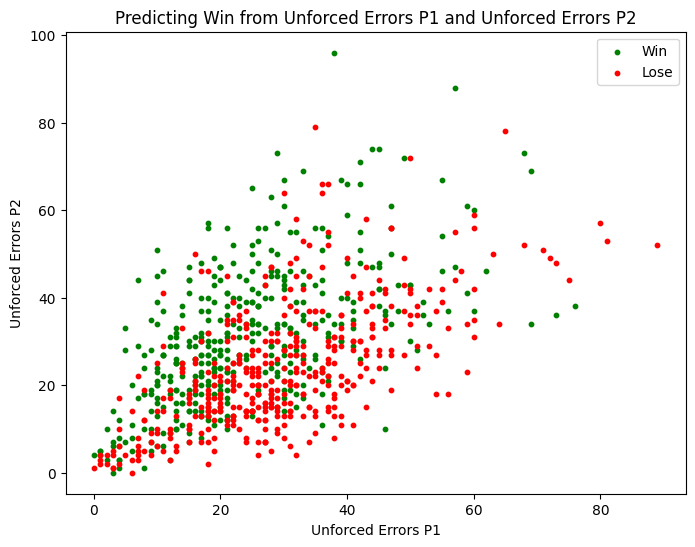

In [5]:
# Visualize the data
indices_pos1 = (Y == 1).nonzero()[0]
indices_neg1 = (Y == -1).nonzero()[0]
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],
            c='green', label=pos_label, s=10)
plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],
            c='red', label=neg_label, s=10)
plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Predicting {pos_label} from {x_label} and {y_label}')
plt.show()

# 80% Training / 20% Testing

Trial 1


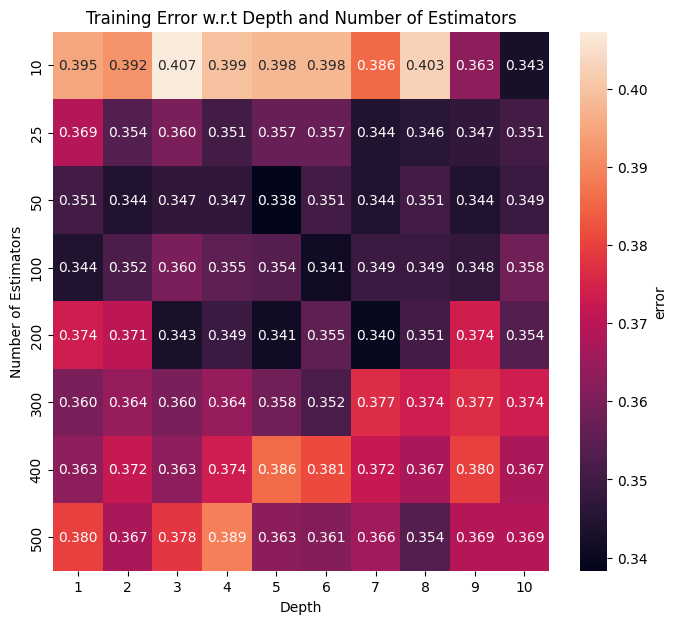

Optimal depth: 4
Optimal number of estimators: 10
Optimal training error: 0.29402756508422667
Trial 2


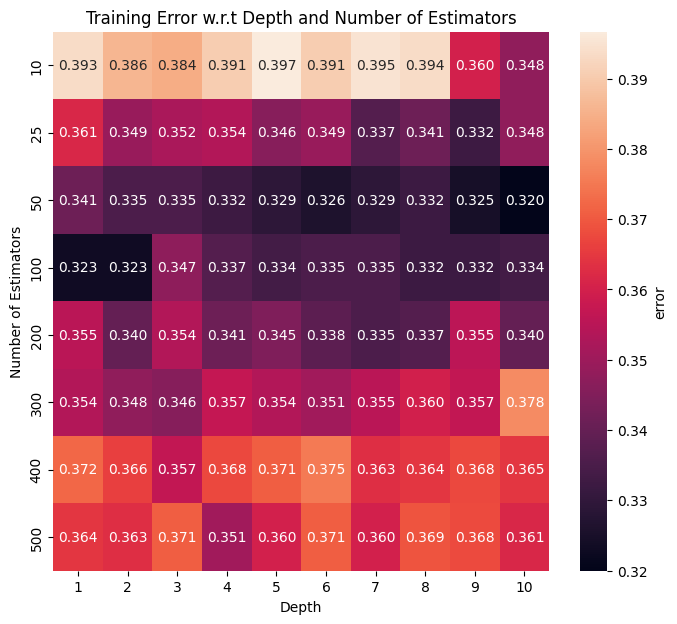

Optimal depth: 4
Optimal number of estimators: 300
Optimal training error: 0.2679938744257274
Trial 3


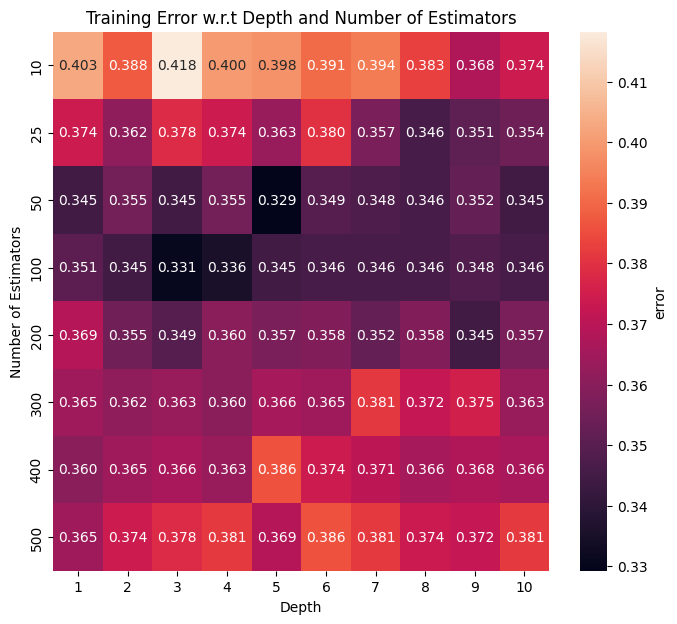

Optimal depth: 4
Optimal number of estimators: 10
Optimal training error: 0.2879019908116386
Trial 4


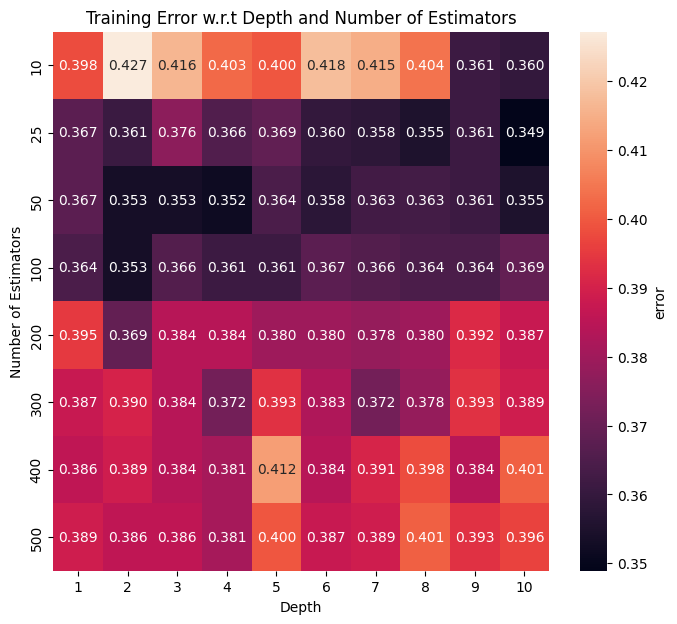

Optimal depth: 3
Optimal number of estimators: 100
Optimal training error: 0.3047473200612557
Trial 5


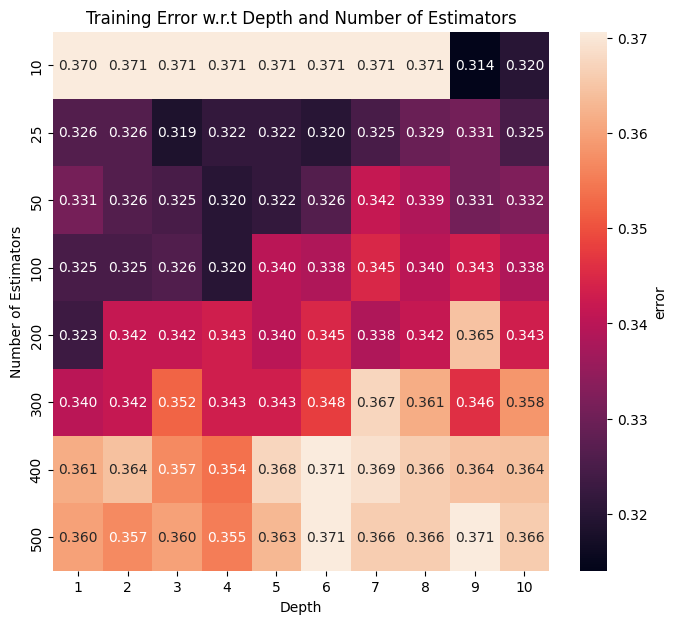

Optimal depth: 2
Optimal number of estimators: 10
Optimal training error: 0.3108728943338438


In [6]:
# Run experiment with 20% test size
best_classifiers_82 = experiment(X, Y, test_size=0.2)

In [7]:
avg_test_error_82 = 0
for (key, value) in best_classifiers_82.items():
    print(f'D: {value['opt_D']}')
    print(f'Number of Estimators: {value['opt_N']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_82 += value['opt_e_testing']

avg_test_error_82 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_82}')

D: 4
Number of Estimators: 10
Training Error: 0.29402756508422667
Test Error: 0.36585365853658536
D: 4
Number of Estimators: 300
Training Error: 0.2679938744257274
Test Error: 0.35365853658536583
D: 4
Number of Estimators: 10
Training Error: 0.2879019908116386
Test Error: 0.36585365853658536
D: 3
Number of Estimators: 100
Training Error: 0.3047473200612557
Test Error: 0.28658536585365857
D: 2
Number of Estimators: 10
Training Error: 0.3108728943338438
Test Error: 0.4390243902439024
Average Test Error: 0.3621951219512195


# 50% Training / 50% Testing

Trial 1


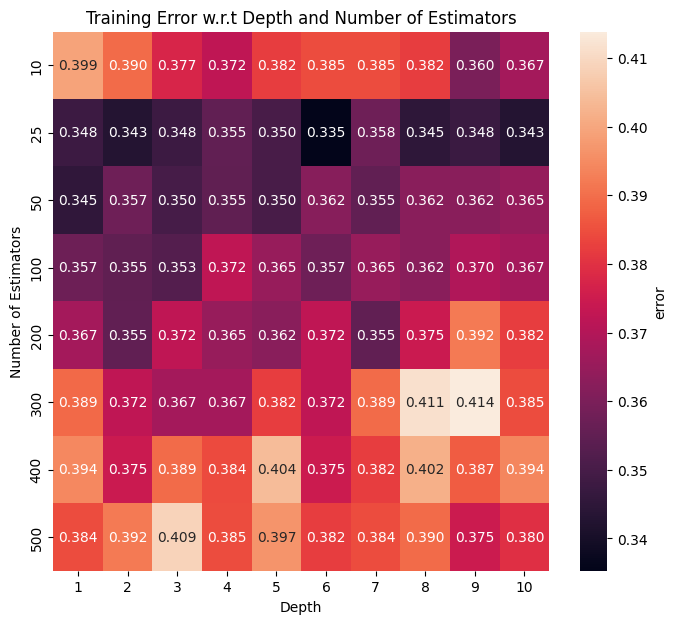

Optimal depth: 2
Optimal number of estimators: 500
Optimal training error: 0.303921568627451
Trial 2


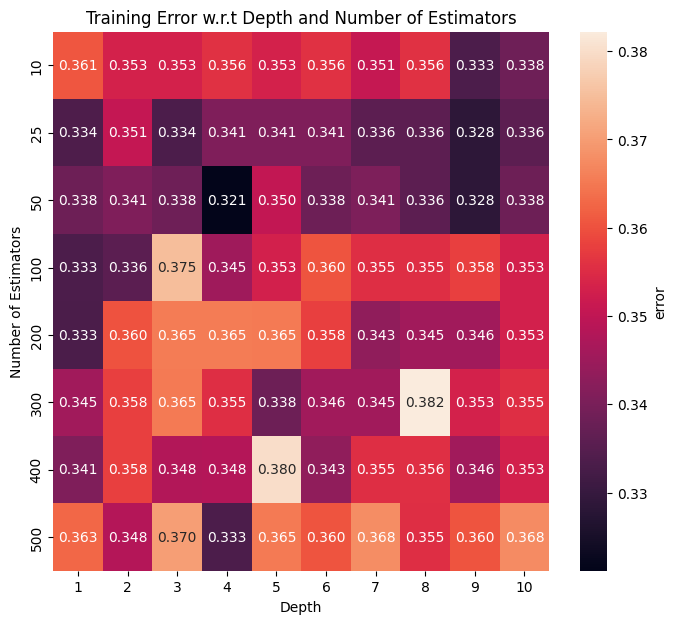

Optimal depth: 3
Optimal number of estimators: 500
Optimal training error: 0.2818627450980392
Trial 3


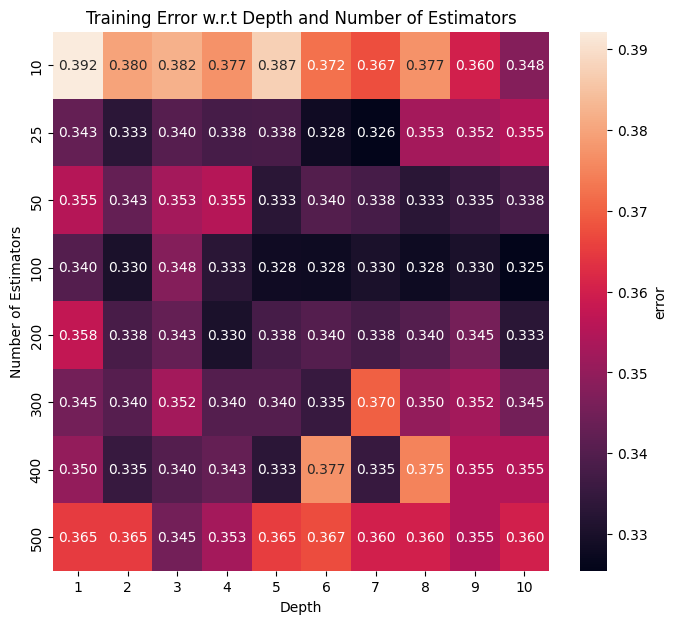

Optimal depth: 5
Optimal number of estimators: 500
Optimal training error: 0.20343137254901966
Trial 4


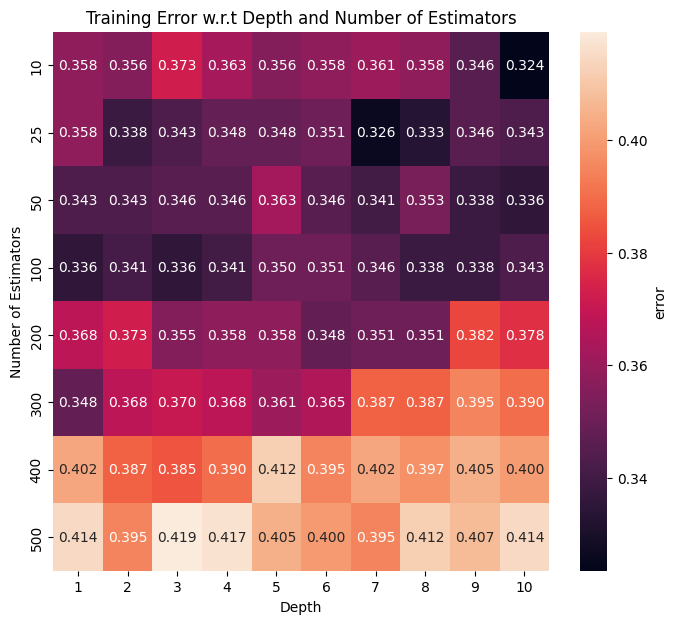

Optimal depth: 2
Optimal number of estimators: 25
Optimal training error: 0.2818627450980392
Trial 5


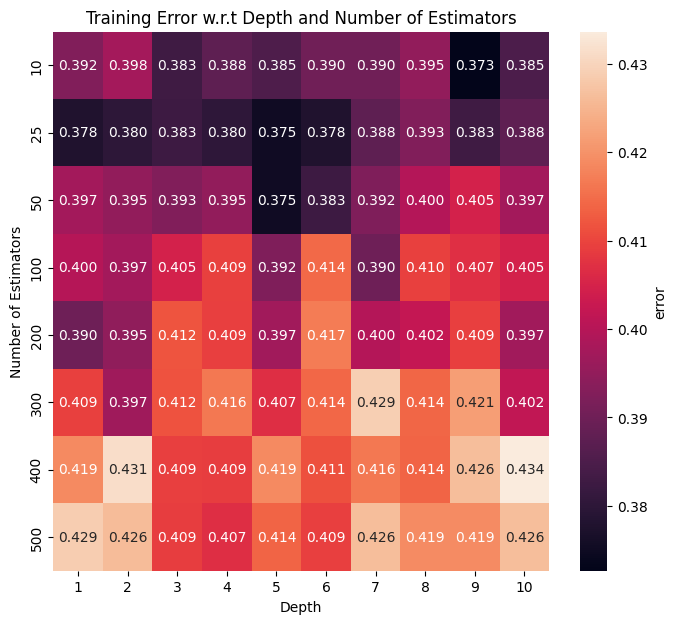

Optimal depth: 2
Optimal number of estimators: 10
Optimal training error: 0.31862745098039214


In [8]:
# Run experiment with 50% test size
best_classifiers_55 = experiment(X, Y, test_size=0.5)

In [9]:
avg_test_error_55 = 0
for (key, value) in best_classifiers_55.items():
    print(f'D: {value['opt_D']}')
    print(f'Number of Estimators: {value['opt_N']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_55 += value['opt_e_testing']

avg_test_error_55 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_55}')

D: 2
Number of Estimators: 500
Training Error: 0.303921568627451
Test Error: 0.37652811735941316
D: 3
Number of Estimators: 500
Training Error: 0.2818627450980392
Test Error: 0.36430317848410754
D: 5
Number of Estimators: 500
Training Error: 0.20343137254901966
Test Error: 0.3569682151589242
D: 2
Number of Estimators: 25
Training Error: 0.2818627450980392
Test Error: 0.3569682151589242
D: 2
Number of Estimators: 10
Training Error: 0.31862745098039214
Test Error: 0.32762836185819066
Average Test Error: 0.356479217603912


# 20% Training / 80% Testing

Trial 1


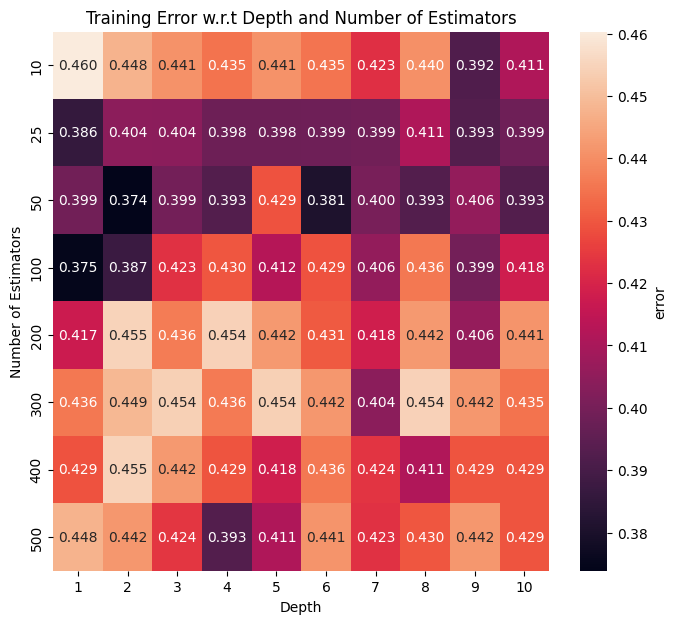

Optimal depth: 3
Optimal number of estimators: 300
Optimal training error: 0.245398773006135
Trial 2


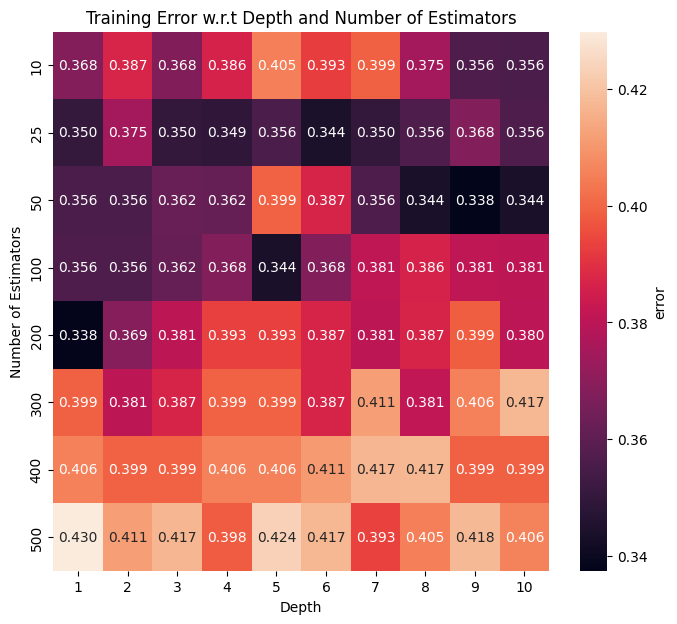

Optimal depth: 4
Optimal number of estimators: 200
Optimal training error: 0.17177914110429449
Trial 3


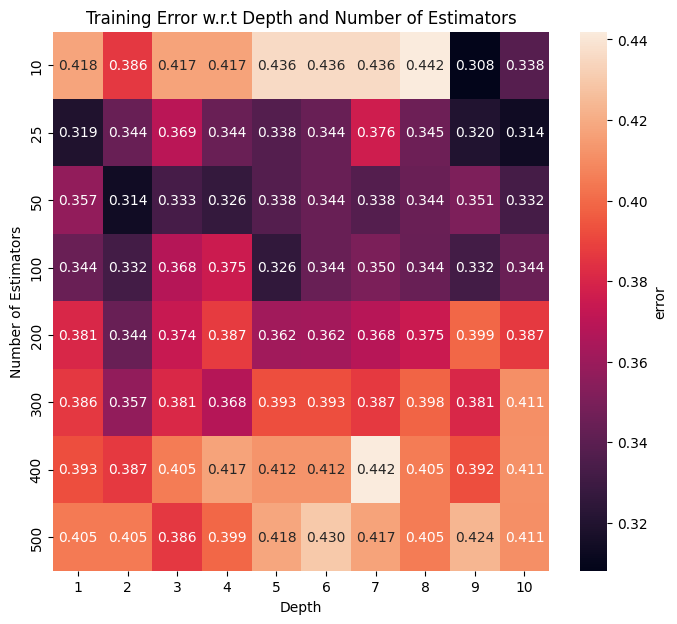

Optimal depth: 2
Optimal number of estimators: 10
Optimal training error: 0.26993865030674846
Trial 4


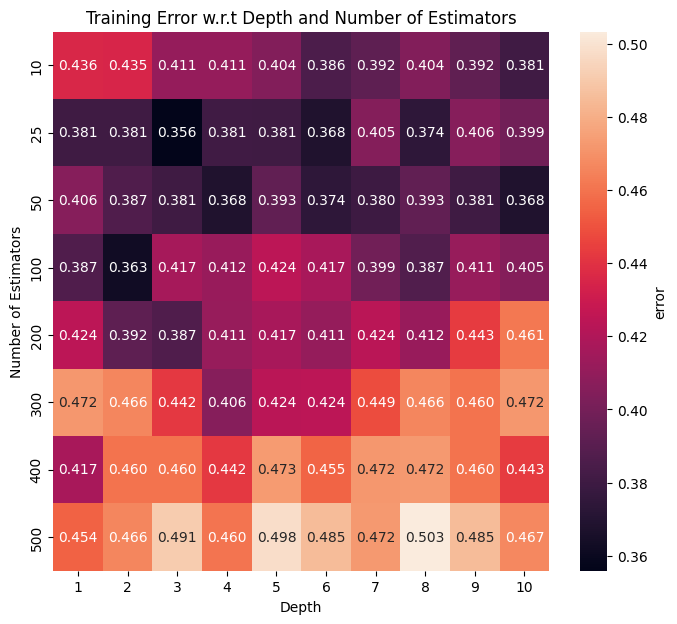

Optimal depth: 2
Optimal number of estimators: 200
Optimal training error: 0.29447852760736193
Trial 5


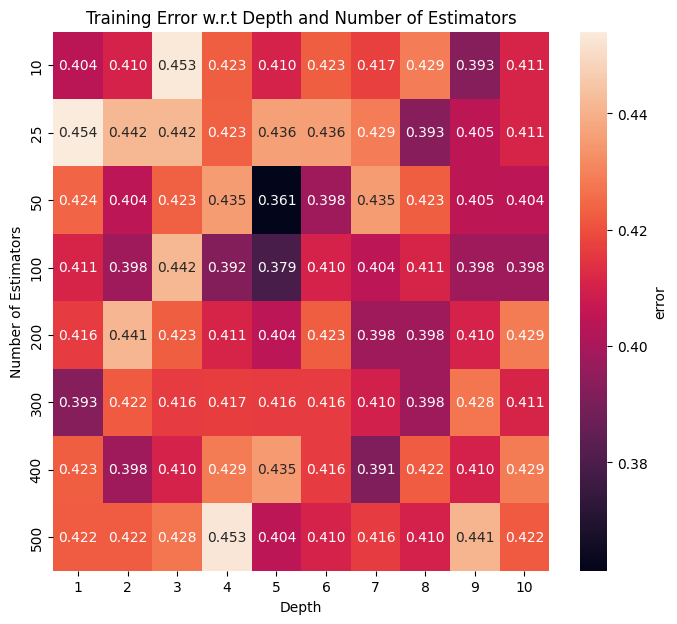

Optimal depth: 4
Optimal number of estimators: 10
Optimal training error: 0.23926380368098155


In [10]:
# Run experiment with 80% test size
best_classifiers_28 = experiment(X, Y, 0.8)

In [11]:
avg_test_error_28 = 0
for (key, value) in best_classifiers_28.items():
    print(f'D: {value['opt_D']}')
    print(f'Number of Estimators: {value['opt_N']}')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_28 += value['opt_e_testing']

avg_test_error_28 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_28}')

D: 3
Number of Estimators: 300
Training Error: 0.245398773006135
Test Error: 0.36544342507645255
D: 4
Number of Estimators: 200
Training Error: 0.17177914110429449
Test Error: 0.3241590214067278
D: 2
Number of Estimators: 10
Training Error: 0.26993865030674846
Test Error: 0.37155963302752293
D: 2
Number of Estimators: 200
Training Error: 0.29447852760736193
Test Error: 0.3669724770642202
D: 4
Number of Estimators: 10
Training Error: 0.23926380368098155
Test Error: 0.35474006116207946
Average Test Error: 0.3565749235474006


# All Available Variables
- best_classifiers_82
- avg_test_error_82
- best_classifiers_55
- avg_test_error_55
- best_classifiers_28
- avg_test_error_28

Best Classifiers: Contains lowest training error (best-in-fold) classifiers from all trials

Average Test Error: Average test error of the best classifiers (lowest validation error) from each trial

In [12]:
print('Average Test Error for 20% Test Size: ', avg_test_error_82)
print('Average Test Error for 50% Test Size: ', avg_test_error_55)
print('Average Test Error for 80% Test Size: ', avg_test_error_28)

Average Test Error for 20% Test Size:  0.3621951219512195
Average Test Error for 50% Test Size:  0.356479217603912
Average Test Error for 80% Test Size:  0.3565749235474006
